# Import packages

In [1]:
import sys
import subprocess
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
from anndata import AnnData
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import gseapy as gp
from collections import Counter

sys.path.append('../../single_cell_pipeline_output_toolkit_v1')
sys.path.append('../../monkeybread/src')
sys.path.append('../../dendritic_cell_analysis')

from dendritic_cell_analysis import process_single_cell as dca_process
from single_cell_pipeline_output_toolkit_v1 import pipeline_output_toolkit as pot
import monkeybread as mb 

#import volcano


In [2]:
subprocess.run('mkdir ./output/publication_figures', shell=True)

adata = anndata.read_h5ad('./output/HumanMelanomaPatient2_labeled.h5ad')
adata.uns['log1p']['base'] = None
adata.obs['Cell Type'] = pd.Categorical(
    adata.obs['Cell Type'], 
    categories=[
        'B lineage',
        'CD4 T',
        'CD8 T',
        'Treg',
        'NK',
        'pDC',
        'cDC',
        'mregDC',
        'mono/mac',
        'granulocyte',
        'stromal',
        'malignant',
        'endothelial',
        'other'
    ], ordered=True)


mkdir: cannot create directory ‘./output/publication_figures’: File exists


categories: B lineage, CD4 T (DC interaction), CD4 T (Tcm), etc.
var_group_labels: T cell, CD8 T, CD4 T, etc.


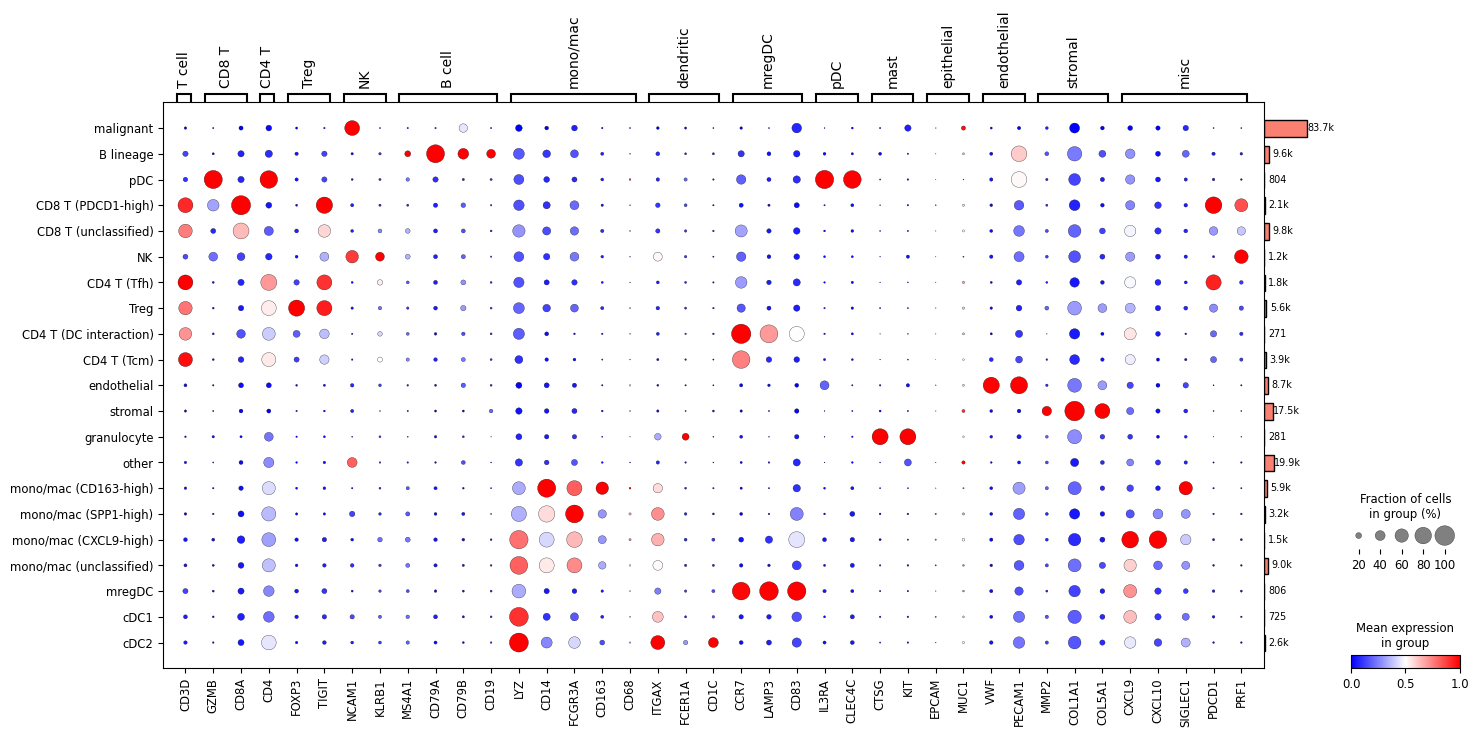

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Type',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
fig.savefig('./output/publication_figures/cell_subtypes_embedding.pdf', format='pdf')
plt.show()


sc.tl.dendrogram(adata, groupby='Cell Subtype')
dp = sc.pl.dotplot(
    adata, 
    var_names={
        'T cell': [
            'CD3D'
        ],
        'CD8 T': [
            'GZMB',
            'CD8A'
        ],
        'CD4 T': [
            'CD4'
        ],
        'Treg': [
            'FOXP3', 
            'TIGIT'
        ],
        'NK': [
            'NCAM1', 
            'KLRB1'
        ],
        'B cell': [
            'MS4A1',
            'CD79A',
            'CD79B',
            'CD19'
        ],
        'mono/mac': [
            'LYZ', 
            'CD14', 
            'FCGR3A', 
            'CD163',
            'CD68'
        ],
        'dendritic': [
            'ITGAX',
            'FCER1A',
            'CD1C'
        ],
        'mregDC': [
            'CCR7',
            'LAMP3',
            'CD83'
        ],
        'pDC': [
            'IL3RA',
            'CLEC4C'
            #LILRA4
            #PLD4  
        ],
        'mast': [
            'CTSG',
            'KIT'
        ],
        'epithelial': [
            'EPCAM',
            'MUC1'
        ],
        'endothelial': [
            'VWF', 
            'PECAM1'
        ],
        'stromal': [
            'MMP2',
            'COL1A1',
            'COL5A1'
        ],
        'misc': [
            'CXCL9',
            'CXCL10',
            'SIGLEC1',
            'PDCD1',
            'PRF1'
        ]
    },
    groupby=['Cell Subtype'],
    standard_scale='var',
    cmap='bwr',
    dendrogram=True,
    return_fig=True
)
dp.add_totals().show()

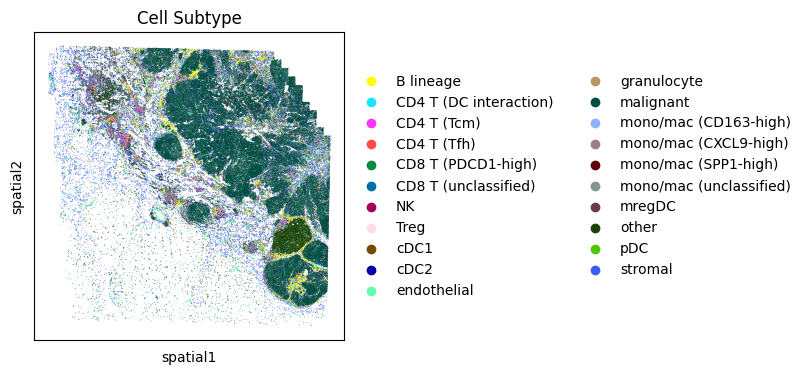

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Subtype',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.godsnot_102,
    show=False
)
plt.show()
plt.tight_layout()
fig.savefig('./output/publication_figures/cell_subtypes_embedding.pdf', format='pdf', bbox_inches='tight')
fig.savefig('./output/publication_figures/cell_subtypes_embedding.png', format='png', dpi=250, bbox_inches='tight')

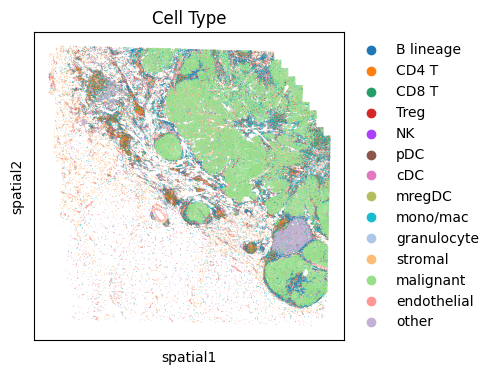

<Figure size 640x480 with 0 Axes>

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'Cell Type',
    s=1,
    ax=ax,
    palette=sc.pl.palettes.vega_20_scanpy,
    show=False
)
plt.show()
plt.tight_layout()
fig.savefig('./output/publication_figures/cell_types_embedding.pdf', format='pdf', bbox_inches='tight')
fig.savefig('./output/publication_figures/cell_types_embedding.png', format='png', dpi=250, bbox_inches='tight')

## Examination of marker genes associated with M1 vs. M2 macrophages

In [6]:
adata_mac = adata[adata.obs['Cell Type'] == 'mono/mac']
sc.pp.scale(adata_mac)

new_labels = []
for ct in adata_mac.obs['Cell Subtype']:
    if ct == 'mono/mac (CD163-high)':
        new_labels.append('CD163-high')
    elif ct == 'mono/mac (SPP1-high)':
        new_labels.append('SPP1-high')
    elif ct == 'mono/mac (CXCL9-high)':
        new_labels.append('CXCL9-high')
    else:
        new_labels.append('Unclassified')
adata_mac.obs['Mono/mac Subtype'] = new_labels
adata_mac.obs['Mono/mac Subtype'] = adata_mac.obs['Mono/mac Subtype'].astype('category')


sc.tl.dendrogram(adata_mac, groupby='Mono/mac Subtype')

dp = sc.pl.matrixplot(
    adata_mac, 
    var_names={
        'Suppressive': [
            'CD163',
            'IL10',
            'C1QC',
            'MRC1',
            'SPP1',
        ],
        'Immunogenic': [
            'CXCL9',
            'CXCL10',
            'CXCL11'
        ]
    },
    groupby='Mono/mac Subtype',
    #standard_scale='var',
    cmap='bwr',
    vmin=-1,
    vmax=1,
    swap_axes=True,
    return_fig=True
)
dp.add_totals().show()

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## Examination of spatial distribution of M1 vs. M2 macrophages

### Kernel density plots

Monkeybread enables one to visualize the spatial density of cells of a given cell type across the tissue using kernel density estimation. Below, we calculate and then display the distribution of M2-like macrophages across the tissue.

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1222: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../monkeybread/src/monkeybread/calc/_kernel_density.py:86: RuntimeWarning: overflow encountered in exp
  kernel = 1 / np.exp(np.square(bin_distances / bandwidth))
/mnt/disks/scratch/mbernstein/notebooks/2023-08-09_monkeybread_development_V2/../../

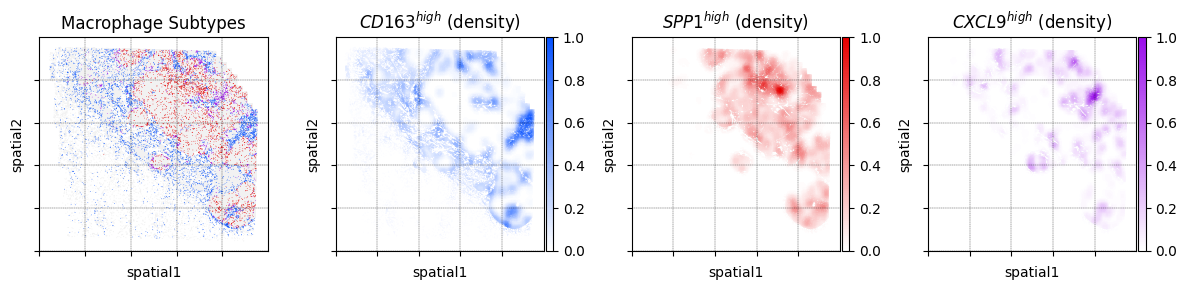

In [7]:
# ad, groups, groupby, groupnames, dot_size=7, title=None, grid=True, n_grids = 5
fig, _ = mb.plot.location_and_density(
    adata, 
    'Cell Subtype', 
    [['mono/mac (CD163-high)'], ['mono/mac (SPP1-high)'], ['mono/mac (CXCL9-high)']],     
    [r'$CD163^{high}$', r'$SPP1^{high}$', r'$CXCL9^{high}$'],
    dot_size=[1, 1, 1], 
    title='Macrophage Subtypes', 
    grid=True, 
    n_grids=5,
    show=False
)
plt.tight_layout()
fig.savefig('./output/publication_figures/density_location_macrophage_subtypes.pdf', format='pdf')
plt.show()

# Niche analysis

In [8]:
niche_subtypes = []
other_cell_types = ['other', 'malignant']
for cell, ct in zip(adata.obs.index, adata.obs['Cell Subtype']):
    if ct in other_cell_types:
        niche_subtypes.append('malignant/other')
    else:
        niche_subtypes.append(ct)
adata.obs['niche_subtypes'] = niche_subtypes

In [9]:
set(adata.obs['niche_subtypes'])

{'B lineage',
 'CD4 T (DC interaction)',
 'CD4 T (Tcm)',
 'CD4 T (Tfh)',
 'CD8 T (PDCD1-high)',
 'CD8 T (unclassified)',
 'NK',
 'Treg',
 'cDC1',
 'cDC2',
 'endothelial',
 'granulocyte',
 'malignant/other',
 'mono/mac (CD163-high)',
 'mono/mac (CXCL9-high)',
 'mono/mac (SPP1-high)',
 'mono/mac (unclassified)',
 'mregDC',
 'pDC',
 'stromal'}

In [10]:
adata.obs['niche_subtypes'] = adata.obs['niche_subtypes'].astype('category')
adata_neighbors = mb.calc.neighborhood_profile(
    adata,
    groupby = "niche_subtypes",
    radius = 75,
    normalize_counts=True,
    standard_scale=True,
    clip_min=-5,
    clip_max=5
)

adata_neighbors.obs['niche_subtypes'] = adata.obs['niche_subtypes']

In [11]:
adata_neighbors_immune = adata_neighbors[
    ~adata_neighbors.obs['niche_subtypes'].isin([
        'malignant/other', 'endothelial', 'stromal'
    ])
]

print("Shape: ", adata_neighbors_immune.shape)

total_neighbors = np.sum(adata_neighbors_immune.X, axis=1)
adata_neighbors_immune.obs['total_neighbors'] = total_neighbors

#sc.pp.pca(adata_neighbors_immune, n_comps=5)
sc.pp.neighbors(adata_neighbors_immune)

Shape:  (59221, 20)


/tmp/ipykernel_27954/3580138888.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_neighbors_immune.obs['total_neighbors'] = total_neighbors
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59

In [12]:
adata_neighbors_immune.var_names

Index(['stromal', 'mono/mac (CD163-high)', 'cDC2', 'endothelial',
       'malignant/other', 'granulocyte', 'Treg', 'CD4 T (Tcm)', 'pDC', 'NK',
       'B lineage', 'CD4 T (Tfh)', 'CD8 T (unclassified)',
       'mono/mac (unclassified)', 'CD8 T (PDCD1-high)', 'cDC1',
       'mono/mac (CXCL9-high)', 'mregDC', 'CD4 T (DC interaction)',
       'mono/mac (SPP1-high)'],
      dtype='object')

#### Visualize the normalized neighborhood scores

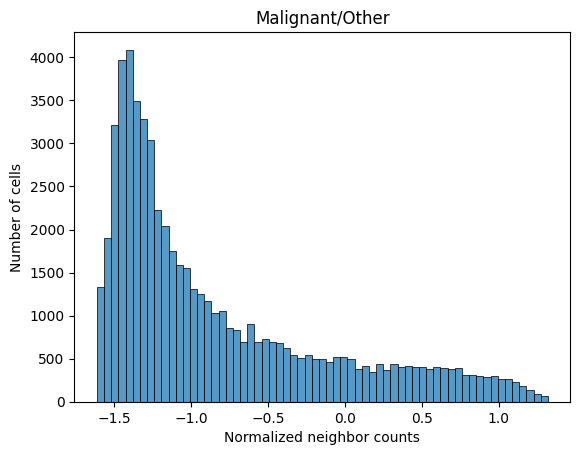

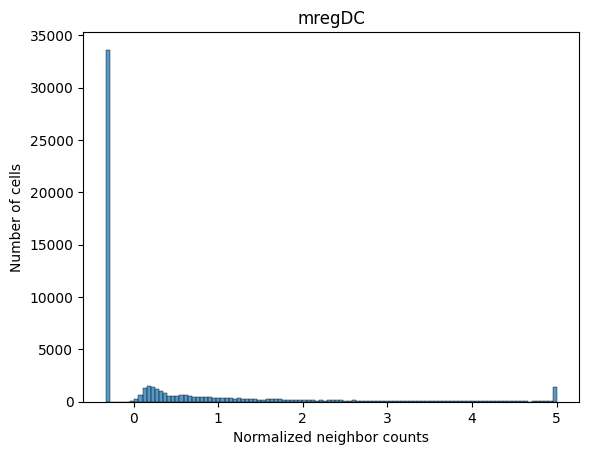

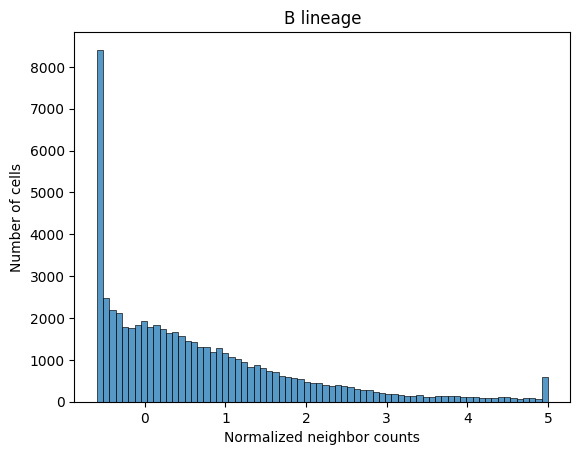

In [13]:
sns.histplot(adata_neighbors_immune.obs_vector('malignant/other'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('Malignant/Other')
plt.show()

sns.histplot(adata_neighbors_immune.obs_vector('mregDC'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('mregDC')
plt.show()

sns.histplot(adata_neighbors_immune.obs_vector('B lineage'))
plt.xlabel('Normalized neighbor counts')
plt.ylabel('Number of cells')
plt.title('B lineage')
plt.show()

In [14]:
#adata_neighbors_immune = adata_neighbors_immune[:,list(set(adata_neighbors_immune.var_names) - set(['other']))]
print(adata_neighbors_immune.shape)
sc.pp.neighbors(
    adata_neighbors_immune, 
    n_neighbors=100
)

(59221, 20)


In [55]:
sc.tl.leiden(
    adata_neighbors_immune, 
    resolution=0.25
)

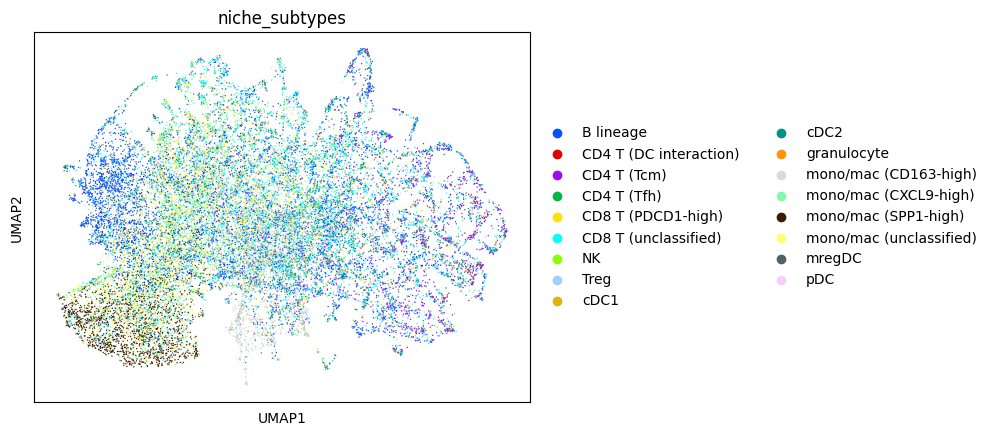

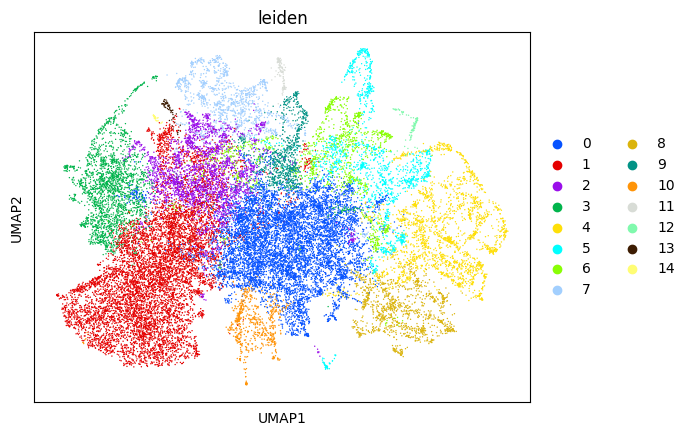

In [56]:
adata_neighbors_immune_sub = sc.pp.subsample(adata_neighbors_immune, fraction=1/2, copy=True)
sc.tl.umap(adata_neighbors_immune_sub)
sc.pl.umap(
    adata_neighbors_immune_sub, 
    color='niche_subtypes', 
    palette=mb.plot.monkey_palette
)
sc.pl.umap(
    adata_neighbors_immune_sub, 
    color='leiden', 
    palette=mb.plot.monkey_palette
)

In [57]:
clust_to_count = Counter(adata_neighbors_immune.obs['leiden'])
clust_to_count

Counter({'10': 1424,
         '0': 15495,
         '1': 15470,
         '5': 2944,
         '6': 2677,
         '4': 4177,
         '7': 2372,
         '9': 1771,
         '2': 5802,
         '8': 2242,
         '13': 125,
         '12': 152,
         '3': 4308,
         '11': 197,
         '14': 65})

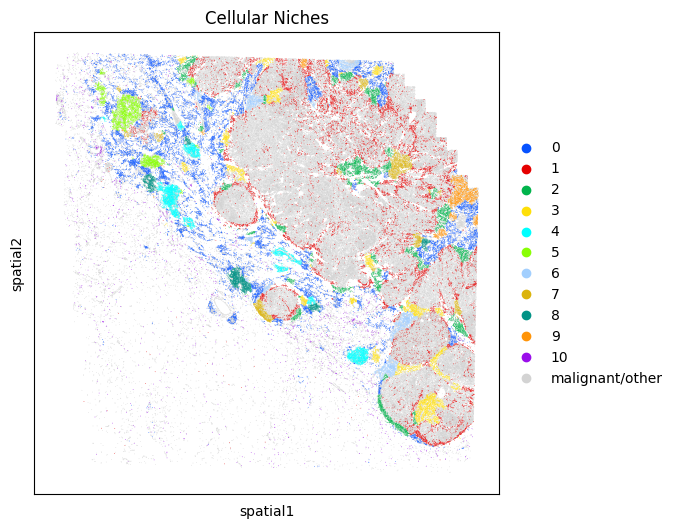

In [58]:
OTHER_KEY = 'malignant/other'

clust_to_count = Counter(adata_neighbors_immune.obs['leiden'])
small_clusts = [
    clust
    for clust, count in clust_to_count.items()
    if count < 300
]
adata_neighbors_immune.obs['niche'] = [
    clust
    if clust not in small_clusts
    else OTHER_KEY
    for clust in adata_neighbors_immune.obs['leiden']
]

# Map niche to color
val_to_color = {
    val: mb.plot.monkey_palette[i]
    for i, val in enumerate(sorted(set(adata_neighbors_immune.obs['niche'])))
}
val_to_color[OTHER_KEY] = 'lightgrey'


cell_to_niche = {
    cell: niche
    for cell, niche in zip(adata_neighbors_immune.obs.index, adata_neighbors_immune.obs['niche'])
}
adata.obs['niche'] = [
    cell_to_niche[cell]
    if cell in cell_to_niche
    else OTHER_KEY
    for cell in adata.obs.index
]


fig, ax = plt.subplots(1,1,figsize=(6,6))
sc.pl.embedding(
    adata,
    "spatial",
    color = 'niche',
    palette=val_to_color,
    s=1,
    ax=ax,
    show=False
)
ax.set_title('Cellular Niches')
fig.savefig('./output/publication_figures/niches_spatial.pdf', format='pdf', dpi=150)
plt.show()

In [59]:
print('\n'.join(sorted(adata_neighbors_immune.var_names)))

B lineage
CD4 T (DC interaction)
CD4 T (Tcm)
CD4 T (Tfh)
CD8 T (PDCD1-high)
CD8 T (unclassified)
NK
Treg
cDC1
cDC2
endothelial
granulocyte
malignant/other
mono/mac (CD163-high)
mono/mac (CXCL9-high)
mono/mac (SPP1-high)
mono/mac (unclassified)
mregDC
pDC
stromal


In [60]:
sc.tl.rank_genes_groups(adata_neighbors_immune, method='t-test', groupby='niche')
sc.pl.rank_genes_groups(adata_neighbors_immune)

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py

In [61]:
mb.plot.neighbors_profile_matrixplot(
    adata_neighbors_immune,
    'niche',
    include_niches=[ # Exclude the miscellaneous niches from the plot
        niche 
        for niche in set(adata_neighbors_immune.obs['niche'])
        if niche != OTHER_KEY
    ],
    clustermap_kwargs={
        'linewidths': 0.5,
        'linecolor': 'black',
        'cmap': 'bwr',
        'clip_on': False,
        'vmin': -2.5,
        'vmax': 2.5,
        'figsize': (6.5,5.5)
    }
)
plt.savefig('./output/publication_figures/niche_heatmap.pdf', format='pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

In [63]:
adata.write_h5ad('./output/HumanMelanomaPatient2_labeled_niches.h5ad')
adata_neighbors_immune.write_h5ad('./output/HumanMelanomaPatient2_neighborhood_profiles.h5ad')

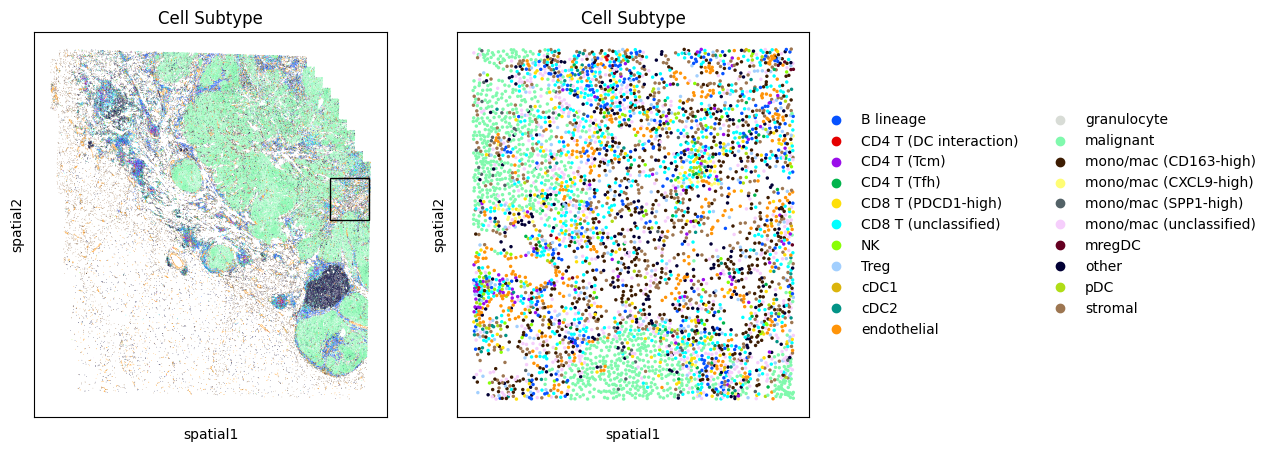

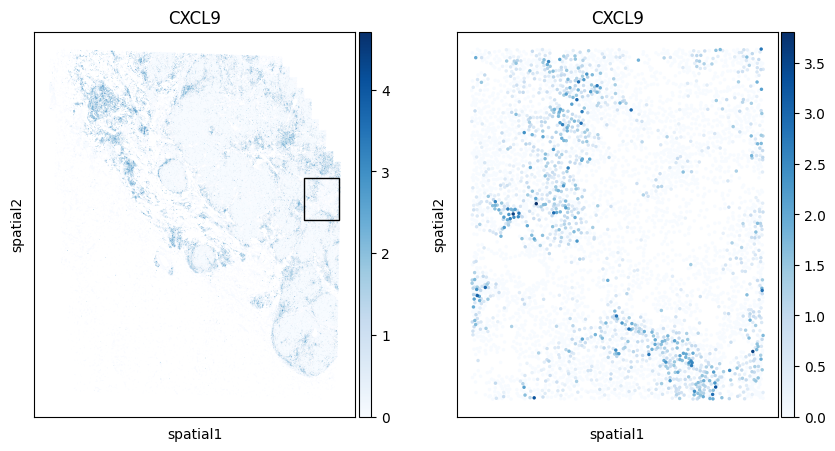

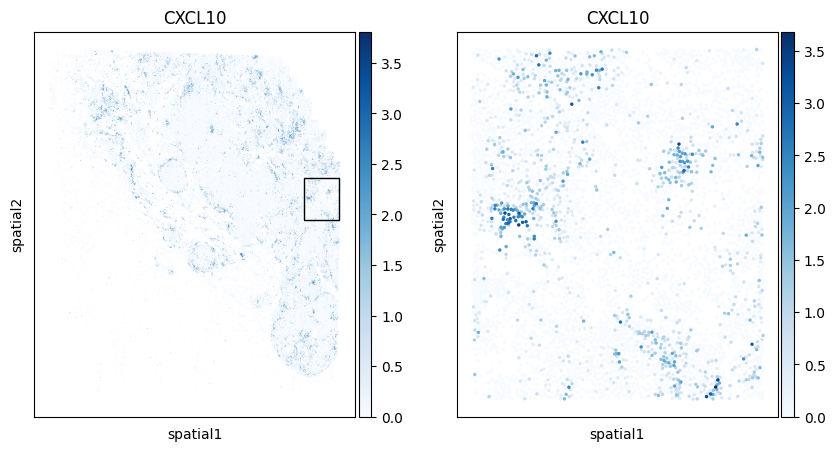

In [49]:
LEFT_PCT = 0.84
TOP_PCT = 0.38
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='Cell Type', 
    mask=None, 
    basis='spatial', 
    palette=ct_to_color,
    show=True,
    axs=axarr
)

fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Subtype'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='Cell Subtype', 
    mask=None, 
    basis='spatial', 
    palette=ct_to_color,
    show=True,
    axs=axarr
)

fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    mask=None, 
    basis='spatial', 
    palette=val_to_color,
    show=True,
    axs=axarr
);

fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL9', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL10', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);

We'll use Scanpy's native violin plot function to explore the expression of CXCL9 and CXCL10 in all cells within Niches 2 and 5

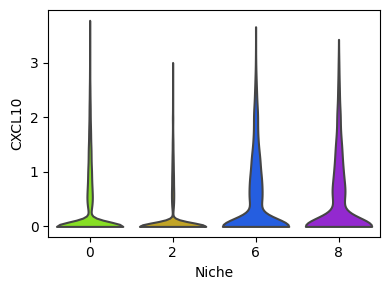

In [52]:
PLOT_NICHES = ['6', '8', '0', '2']

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.violin(
    adata[adata.obs['niche'].isin(PLOT_NICHES)], 
    groupby='niche', 
    keys=['CXCL9'], 
    palette=[
        val_to_color[x]
        for x in PLOT_NICHES
    ],
    ax=ax,
    stripplot=False,
    show=False
)
plt.tight_layout()
ax.set_xlabel('Niche')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,3))
sc.pl.violin(
    adata[adata.obs['niche'].isin(PLOT_NICHES)], 
    groupby='niche', 
    keys=['CXCL10'], 
    palette=[
        val_to_color[x]
        for x in PLOT_NICHES
    ],
    ax=ax,
    stripplot=False,
    show=False
)
plt.tight_layout()
ax.set_xlabel('Niche')
plt.show()


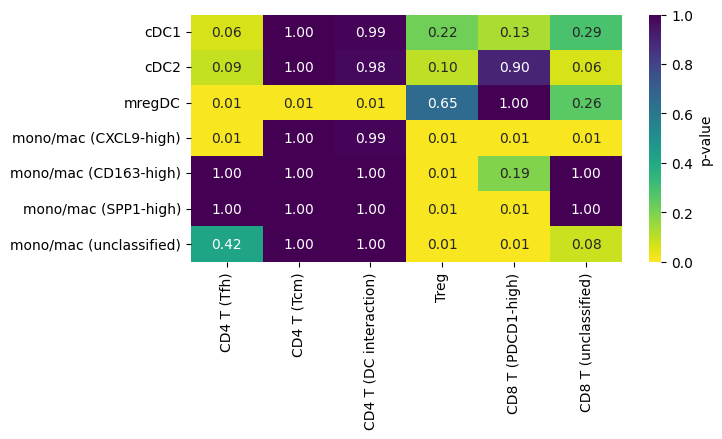

In [30]:
# Only look in niches that are not the malignant/other niche
adata_test = adata[~adata.obs['niche'].isin(['malignant/other'])]

# Define cell types we want to analyze
MOMAC_SUBTYPES = [
    'cDC1',
    'cDC2',
    'mregDC',
    'mono/mac (CXCL9-high)',
    'mono/mac (CD163-high)',
    'mono/mac (SPP1-high)',
    'mono/mac (unclassified)'
]
T_CELL_SUBTYPES = [
    'CD4 T (Tfh)', 
    'CD4 T (Tcm)', 
    'CD4 T (DC interaction)',
    #'CD4 T (unclassified)',
    'Treg',
    'CD8 T (PDCD1-high)', 
    'CD8 T (unclassified)'
]

# Compute distance from each myeloid cell type to the nearest T cell subtype
ct1_to_ct2_to_dists = mb.calc.shortest_distances_pairwise(
    adata_test, 
    'Cell Subtype', 
    MOMAC_SUBTYPES, 
    T_CELL_SUBTYPES
)

# Calculate significance of these shortest distances
ct1_to_ct2_to_perms, ct1_to_ct2_to_pval = mb.stat.shortest_distances_pairwise(
    adata_test, 
    'Cell Subtype', 
    MOMAC_SUBTYPES, 
    T_CELL_SUBTYPES,
    n_perms=100,
    observed=ct1_to_ct2_to_dists, 
    threshold=20
)


fig, ax = plt.subplots(1,1,figsize=(7.5,4.5))
mb.plot.shortest_distances_pairwise(
    ct1_to_ct2_to_pval,
    order_x=T_CELL_SUBTYPES,
    order_y=MOMAC_SUBTYPES,
    ax=ax,
    show=False
);
plt.tight_layout()
fig.savefig('./output/publication_figures/colocalization_p_value_heatmap.pdf', format='pdf')
plt.show()



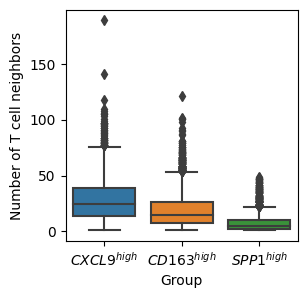

In [22]:
df_counts_m1_m2_t = mb.calc.number_of_neighbors_from_masks(
    adata,
    {
        r'$CXCL9^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (CXCL9-high)',
        r'$CD163^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (CD163-high)',
        r'$SPP1^{high}$': adata.obs['Cell Subtype'] == 'mono/mac (SPP1-high)',
        
    },
    adata.obs['Cell Type'].isin(['CD8 T', 'CD4 T', 'Treg'])
)

fig, ax = plt.subplots(1,1,figsize=(3,3))
mb.plot.number_of_neighbors(
    df_counts_m1_m2_t,
    plot='box',
    stripplot=False,
    strip_kwargs={'s': 1},
    ax=ax
)
ax.set_ylabel('Number of T cell neighbors')
plt.show()

## DE Between T cells in Niche 6 versus Niche 2

In [87]:
adata_t = adata[adata.obs['Cell Type'].isin(['CD4 T', 'CD8 T'])]
adata_t = adata_t[adata_t.obs['niche'].isin(['6', '2'])]
sc.tl.rank_genes_groups(adata_t, groupby='niche')

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [88]:
adata_t.obs['Cell Type']

19081    CD4 T
19031    CD4 T
19086    CD4 T
40603    CD4 T
40661    CD8 T
         ...  
87257    CD8 T
87295    CD4 T
87351    CD4 T
88064    CD8 T
88086    CD8 T
Name: Cell Type, Length: 3616, dtype: category
Categories (2, object): ['CD4 T' < 'CD8 T']

In [89]:
df_de = sc.get.rank_genes_groups_df(adata_t, group='6')
df_de = df_de.loc[(df_de['logfoldchanges'] > 0) & (df_de['pvals_adj'] < 0.05)]
top_de_6 = list(df_de['names'])
print(len(top_de_6))
', '.join(top_de_6)

92


'CCR7, KLF2, CXCR4, LAMP3, CXCL9, SELL, NFKB2, TNFRSF13C, ICAM2, CXCR5, TAPBP, CD83, CD5, CD28, IL6R, MYC, TRAC, CD40, ETS1, ZAP70, CD79A, HLA-B, NFKBIA, IDO1, CDKN1B, LEF1, ATM, NFKB1, CD40LG, CD3E, STAT6, MS4A1, ITGA5, PAX5, RELA, LAMC2, JUNB, CD4, STAT4, POU2AF1, CREBBP, IRF3, CCL22, VSIR, BLK, IRF4, MMP9, PPARD, CDKN1A, BRD4, ITK, NLRC5, AKT3, FLT4, ICAM3, PGF, TRAT1, EPHB4, CCR4, SELPLG, STAT5A, MAML1, AKT2, TP53, JAK1, TNFRSF4, CXCL11, TGFBR2, CSF2RA, CD79B, TRBC1, DNMT1, HLA-C, CD22, STING1, SELP, RGMB, GATA3, SOCS3, STAT1, IDO2, BCL2, PRKCA, TLR1, PTPRC, BMI1, HDAC3, FGFBP2, BRAF, CD19, AXIN2, FCRL5'

In [90]:
df_de = sc.get.rank_genes_groups_df(adata_t, group='2')
df_de = df_de.loc[(df_de['logfoldchanges'] > 0) & (df_de['pvals_adj'] < 0.05)]
top_de_2 = list(df_de['names'])
', '.join(top_de_2)

'C1QC, COL1A1, CD14, FCGR3A, FN1, NKG7, SFRP2, CSF1, GZMH, LAG3, HLA-DRB1, HAVCR2, CXCR6, HLA-DRA, LRP1, COL5A1, LMNA, CSF1R, CCR5, GZMB, CCL5, CYBB, MAFB, MRC1, GZMA, FASLG, CCR1, TNFRSF9, BCL2L1, CD8A, CAV1, MARCO, TGFBI, PDCD1, CD163, HLA-DMA, PRF1, IDH1, CCND1, SERPINA1, TREM2, SOD2, CD276, CTSW, LYZ, MMP11, FCGR2A, ZBED2, MSR1, FOS, CCR2, HLA-DPB1, NRP1, BMP1, MMP2, NCR1, TMEM37, CEBPB, CCL4, COL11A1, SIGLEC1, SNAI2, CXCL12, CSF3R, CMKLR1, PDGFRB, AURKB, MMP1, EOMES, KLRK1, FBLN1, HLA-DQA1, KIR2DL4, IL2RB, CXCL16, AMOTL2, EGR1, CCL3, PDGFRA, CD244, CDK6, CD248, CD70, TWIST1, JUN, TBX21, PLA2G2A, PDK4, CXCL1, ITGAM, SLC26A3, VWF, NRAS, PROX1, PDPN, BUB1, WWTR1, ERBB3, IL6, HGF, CTNNB1, CTLA4, CD177, CLEC14A, S100A9, DUSP1, CCL8, IL12A, PDGFC, CD209, FOXM1, ELN, CLEC4C, AKT1, TNFRSF18, CIITA, CLDN5, SLC13A3, TCF7L2, BIRC5, PRTN3, PREX2, IL22, SRC, PDGFA, CXCR2, ITGA1, DKK1, IL1B, FAP, KLRC1, TEAD1, CHEK1, CSF3, LOX, CCNB1, ANGPT2, MZB1, SMOC2, ACKR3, CCR3, CTSG, TEAD4, PCNA, MET, TL

In [91]:
def load_gene_set(fpath, genes_in_data):
    gs_to_genes = {}
    with open(fpath, 'r') as f:
        for l in f.readlines():
            toks = l.strip().split('\t')
            gene_set = toks[0]
            genes = set(toks[2:])
            gs_to_genes[gene_set] = sorted(genes & genes_in_data)
    return gs_to_genes
            
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.reactome.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c7.all.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.kegg.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.bp.v2022.1.Hs.symbols.gmt ./data', shell=True)
subprocess.run('gsutil cp gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.mf.v2022.1.Hs.symbols.gmt ./data', shell=True)

genes_in_data = set(adata.var_names)

reactome_gs_to_genes = load_gene_set('./data/c2.cp.reactome.v2022.1.Hs.symbols.gmt', genes_in_data)
immune_gs_to_genes = load_gene_set('./data/c7.all.v2022.1.Hs.symbols.gmt', genes_in_data)
kegg_gs_to_genes = load_gene_set('./data/c2.cp.kegg.v2022.1.Hs.symbols.gmt', genes_in_data)
go_bp_gs_to_genes = load_gene_set('./data/c5.go.bp.v2022.1.Hs.symbols.gmt', genes_in_data)
go_mf_gs_to_genes = load_gene_set('./data/c5.go.mf.v2022.1.Hs.symbols.gmt', genes_in_data)

gene_set_name_to_mapping = {
    'Reactome (c2)': reactome_gs_to_genes,
#    'Immune (c7)': immune_gs_to_genes, 
    'Kegg (c2)': kegg_gs_to_genes, 
    'GO Biological Process (c5)': go_bp_gs_to_genes, 
    'GO Molecular Function (c5)': go_mf_gs_to_genes    
}

Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.reactome.v2022.1.Hs.symbols.gmt...
/ [1 files][784.2 KiB/784.2 KiB]                                                
Operation completed over 1 objects/784.2 KiB.                                    
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c7.all.v2022.1.Hs.symbols.gmt...
- [1 files][  6.7 MiB/  6.7 MiB]                                                
Operation completed over 1 objects/6.7 MiB.                                      
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c2.cp.kegg.v2022.1.Hs.symbols.gmt...
/ [1 files][ 97.7 KiB/ 97.7 KiB]                                                
Operation completed over 1 objects/97.7 KiB.                                     
Copying gs://immunitas_public_datasets/MSigDB_gene_sets/c5.go.bp.v2022.1.Hs.symbols.gmt...
/ [1 files][  4.8 MiB/  4.8 MiB]                                                
Operation completed over 1 objects/4.8 MiB.                 

In [92]:
total_counts = np.array(np.sum(adata_t.X, axis=0)).squeeze()
is_expressed = np.array(total_counts > 0)
expressed_genes = list(adata_t.var.loc[is_expressed].index)
print(f"{len(expressed_genes)} called 'expressed' genes")

de_genes = top_de_6

for gs_name, gs_to_genes in gene_set_name_to_mapping.items():
    background_genes = set(expressed_genes) | set(de_genes)
    enr = gp.enrich(
        gene_list=de_genes, 
        gene_sets=gs_to_genes,
        background=expressed_genes,
        outdir='./tmp',
        verbose=False
    )
    res_df = enr.results.sort_values(by='P-value', ascending=True).loc[enr.results['Adjusted P-value'] < 0.1]
    print(f"---------------- Gene set: {gs_name} ---------------------")
    print('\n'.join(sorted(res_df['Term'])))
    print()


500 called 'expressed' genes


2023-06-21 18:23:18,763 Warning: No enrich terms using library CUSTOM140693046710272 when cutoff = 0.05


---------------- Gene set: Reactome (c2) ---------------------
REACTOME_ANTIGEN_ACTIVATES_B_CELL_RECEPTOR_BCR_LEADING_TO_GENERATION_OF_SECOND_MESSENGERS
REACTOME_CYTOSOLIC_SENSORS_OF_PATHOGEN_ASSOCIATED_DNA
REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INTERFERON_ALPHA_BETA
REACTOME_SARS_COV_2_HOST_INTERACTIONS
REACTOME_SARS_COV_INFECTIONS
REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR
REACTOME_TAK1_DEPENDENT_IKK_AND_NF_KAPPA_B_ACTIVATION

---------------- Gene set: Kegg (c2) ---------------------
KEGG_PRIMARY_IMMUNODEFICIENCY



2023-06-21 18:23:19,526 Warning: No enrich terms using library CUSTOM140692782826304 when cutoff = 0.05


---------------- Gene set: GO Biological Process (c5) ---------------------
GOBP_ACTIVATION_OF_IMMUNE_RESPONSE
GOBP_ALPHA_BETA_T_CELL_ACTIVATION
GOBP_ANTIGEN_RECEPTOR_MEDIATED_SIGNALING_PATHWAY
GOBP_B_CELL_ACTIVATION
GOBP_B_CELL_PROLIFERATION
GOBP_B_CELL_RECEPTOR_SIGNALING_PATHWAY
GOBP_IMMUNE_RESPONSE_REGULATING_CELL_SURFACE_RECEPTOR_SIGNALING_PATHWAY
GOBP_IMMUNE_RESPONSE_REGULATING_SIGNALING_PATHWAY
GOBP_MONONUCLEAR_CELL_DIFFERENTIATION
GOBP_NEGATIVE_T_CELL_SELECTION
GOBP_T_CELL_SELECTION

---------------- Gene set: GO Molecular Function (c5) ---------------------




In [93]:
de_genes = top_de_2

for gs_name, gs_to_genes in gene_set_name_to_mapping.items():
    background_genes = set(expressed_genes) | set(de_genes)
    enr = gp.enrich(
        gene_list=de_genes, 
        gene_sets=gs_to_genes,
        background=expressed_genes,
        outdir='./tmp',
        verbose=False
    )
    res_df = enr.results.sort_values(by='P-value', ascending=True).loc[enr.results['Adjusted P-value'] < 0.1]
    print(f"---------------- Gene set: {gs_name} ---------------------")
    print('\n'.join(sorted(res_df['Term'])))
    print()

2023-06-21 18:23:19,675 Warning: No enrich terms using library CUSTOM140692619992448 when cutoff = 0.05
2023-06-21 18:23:19,701 Warning: No enrich terms using library CUSTOM140693012026752 when cutoff = 0.05


---------------- Gene set: Reactome (c2) ---------------------


---------------- Gene set: Kegg (c2) ---------------------




2023-06-21 18:23:20,451 Warning: No enrich terms using library CUSTOM140693012171968 when cutoff = 0.05
2023-06-21 18:23:20,547 Warning: No enrich terms using library CUSTOM140693011935872 when cutoff = 0.05


---------------- Gene set: GO Biological Process (c5) ---------------------


---------------- Gene set: GO Molecular Function (c5) ---------------------




# Ligand-receptor analysis

We will no perform a ligand receptor analysis examining how cells of various cell types are interacting in the tumor microenvironment. 

In the following example, we will examine how monocytes/macrophages are interacting with T cells in the tumor microenvironment. Specifically, it is known that CXCL10 and CXCL9 are expressed by immune cells in the presence of interferon gamma. Moreover, CXCL10 and CXCL9 bind to CXCR3. 

Here, we calculate the co-expression score of CXCL10/CXCR3 and CXCL9/CXCR3 between monocytes/macrophages and T cells respectively. This score is defined as `sqrt(l*r)` where `l` is the expression of the ligand and `r` is the expression of the receptor. 

In [31]:
# For each pDC, find the neighboring Tregs
cell_to_neighbors = mb.calc.cell_neighbors(
    adata,
    groupby='Cell Type',
    group1=['mono/mac'],
    group2=['CD8 T', 'CD4 T', 'Treg'],
    radius=20
) 

lr_pair_to_score = mb.calc.ligand_receptor_score(
    adata,
    cell_to_neighbors,
    lr_pairs=[
        ('CXCL10', 'CXCR3'),
        ('CXCL9', 'CXCR3')
    ]
)
lr_pair_to_score

{('CXCL10', 'CXCR3'): 0.17523273833828673,
 ('CXCL9', 'CXCR3'): 0.28427773753439883}

Next we will use these co-expression scores to calculate a p-value for enrichment of co-expression of CXCL10/CXCR3 and CXCL9/CXCR3
between each monocyte/macrophgae and their neighboring T cells.

This statistical test is described in detail in [He _et al_., _bioRxiv_, 2022](https://doi.org/10.1101/2021.11.03.467020) (See Figure 4). 

In [32]:
mb.stat.ligand_receptor_score(
    adata,
    cell_to_neighbors,
    actual_scores=lr_pair_to_score
)

{('CXCL10',
  'CXCR3'): (array([0.17271163, 0.17536253, 0.17074472, 0.17491055, 0.17412865,
         0.17336958, 0.17520898, 0.1740188 , 0.17261328, 0.1721919 ,
         0.1757154 , 0.17204734, 0.17510054, 0.17192415, 0.17311192,
         0.17135589, 0.17256095, 0.17324555, 0.17587738, 0.17537339,
         0.17136776, 0.17191608, 0.1757052 , 0.17038345, 0.17187192,
         0.1734768 , 0.1725482 , 0.17420511, 0.17359234, 0.17262364,
         0.17291575, 0.17310966, 0.17505174, 0.17626446, 0.17602553,
         0.17478835, 0.17307064, 0.17348074, 0.17244898, 0.17177395,
         0.17226892, 0.1707334 , 0.1737264 , 0.17355156, 0.17436111,
         0.1702705 , 0.17348675, 0.17162614, 0.17142534, 0.1719592 ,
         0.1722685 , 0.17322362, 0.17276793, 0.1710184 , 0.17169962,
         0.17365751, 0.17356802, 0.17385835, 0.17130954, 0.17286927,
         0.17282662, 0.17587103, 0.17598773, 0.17084342, 0.1719154 ,
         0.17330916, 0.17253806, 0.17189303, 0.17351625, 0.1727357 ,
         0.

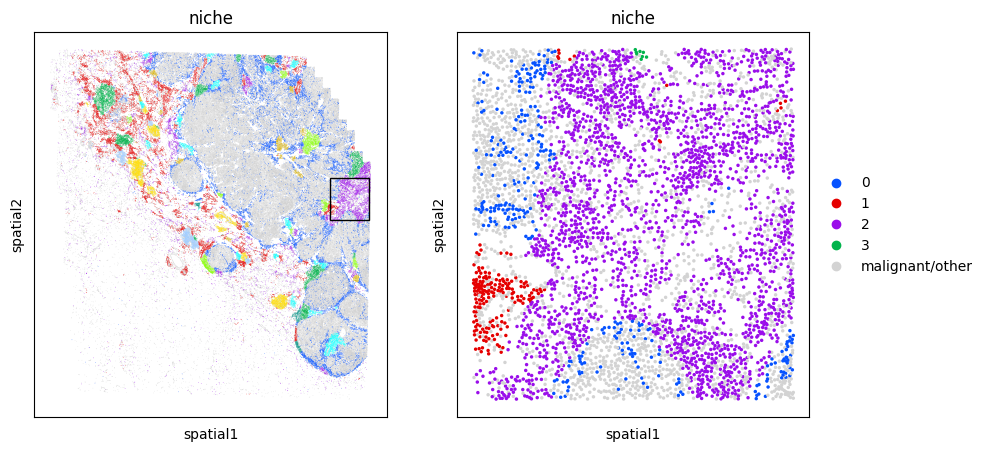

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


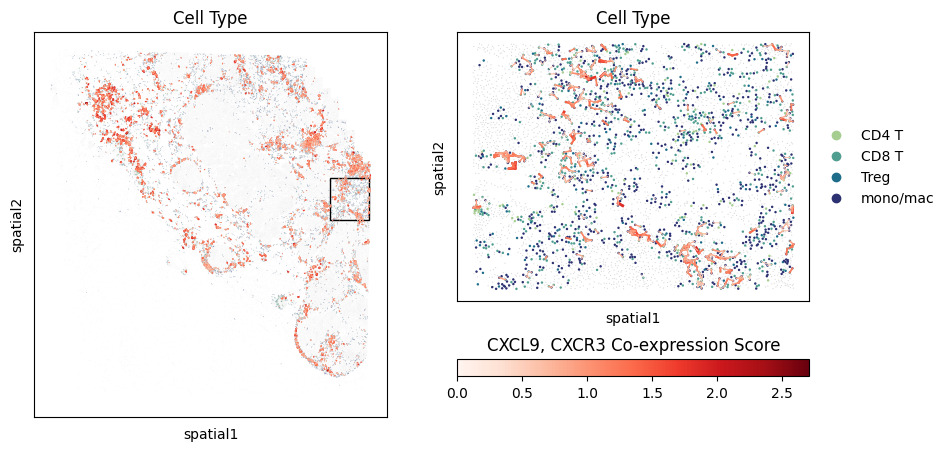

In [53]:
LEFT_PCT = 0.84
TOP_PCT = 0.38
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

# Plot the niche
fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    basis='spatial', 
    #palette=ct_to_color,
    #zoom_s=25,
    #mask=[(x in ['CD4 T', 'mregDC']) for x in adata.obs['Cell Type']],
    #s=5,
    show=True,
    axs=axarr
)

# Plot the cells co-expressing CXCL9/CXCR3
fig, axarr = plt.subplots(1,2,figsize=(10,5))
lr_scores = mb.plot.ligand_receptor_embedding_zoom(
    adata,
    ('CXCL9', 'CXCR3'),
    cell_to_neighbors,
    color='Cell Type',
    palette='crest',
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    cmap_name='Reds',
    max_lw=3,
    max_lw_scale_unzoom=0.5,
    vmin=-1,
    vmax=1,
    axs=axarr
)

In [34]:
fig.savefig('./output/publication_figures/ligand_receptor_zoom_CXCL9_CXCR3.pdf', format='pdf')
plt.show()

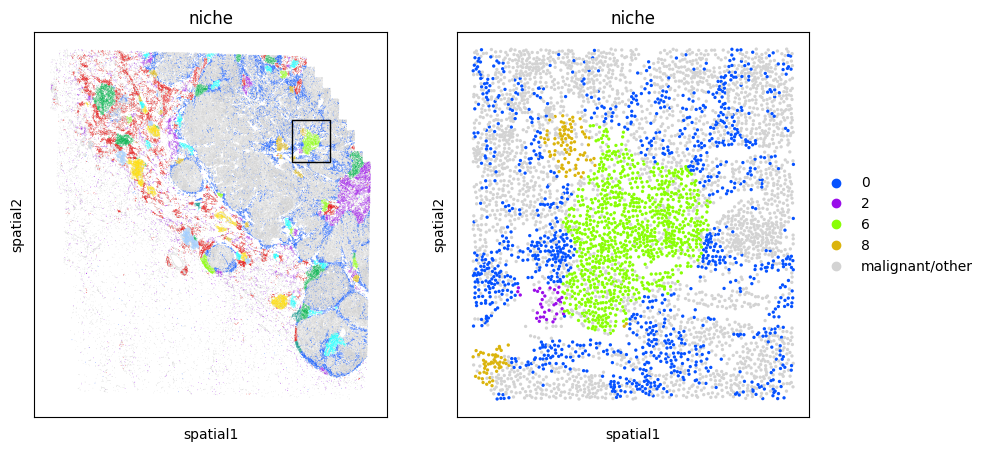

/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


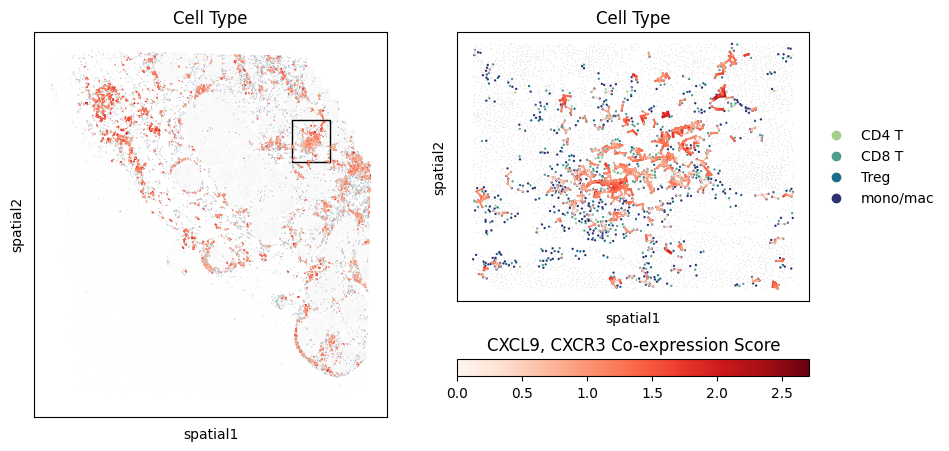

In [58]:
LEFT_PCT = 0.73
TOP_PCT = 0.23
WIDTH_PCT = 0.11
HEIGHT_PCT = 0.11

# Plot the niche
fig, axarr = plt.subplots(1,2,figsize=(10,5))
ct_to_color = {
    ct: mb.plot.monkey_palette[i]
    for i, ct in enumerate(sorted(set(adata.obs['Cell Type'])))
}
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='niche', 
    basis='spatial', 
    #palette=ct_to_color,
    #zoom_s=25,
    #mask=[(x in ['CD4 T', 'mregDC']) for x in adata.obs['Cell Type']],
    #s=5,
    show=True,
    axs=axarr
)

# Plot the cells co-expressing CXCL9/CXCR3
fig, axarr = plt.subplots(1,2,figsize=(10,5))
lr_scores = mb.plot.ligand_receptor_embedding_zoom(
    adata,
    ('CXCL9', 'CXCR3'),
    cell_to_neighbors,
    color='Cell Type',
    palette='crest',
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    cmap_name='Reds',
    max_lw=3,
    max_lw_scale_unzoom=0.5,
    vmin=-1,
    vmax=1,
    axs=axarr
)


/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/mnt/disks/scratch/mbernstein/miniconda3/python3/lib/python3.10/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list


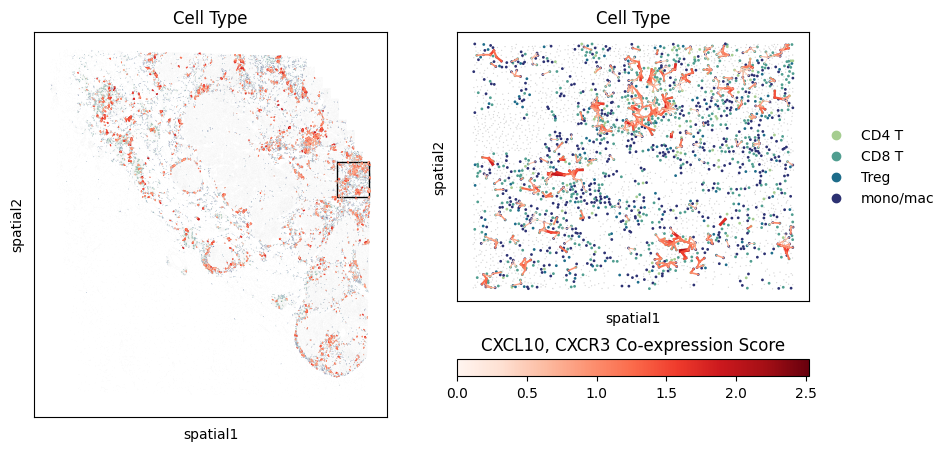

In [35]:

fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.ligand_receptor_embedding_zoom(
    adata,
    ('CXCL10', 'CXCR3'),
    cell_to_neighbors,
    color='Cell Type',
    palette='crest',
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    cmap_name='Reds',
    max_lw=3,
    max_lw_scale_unzoom=0.5,
    vmin=-1,
    vmax=1,
    axs=axarr
)
plt.show()

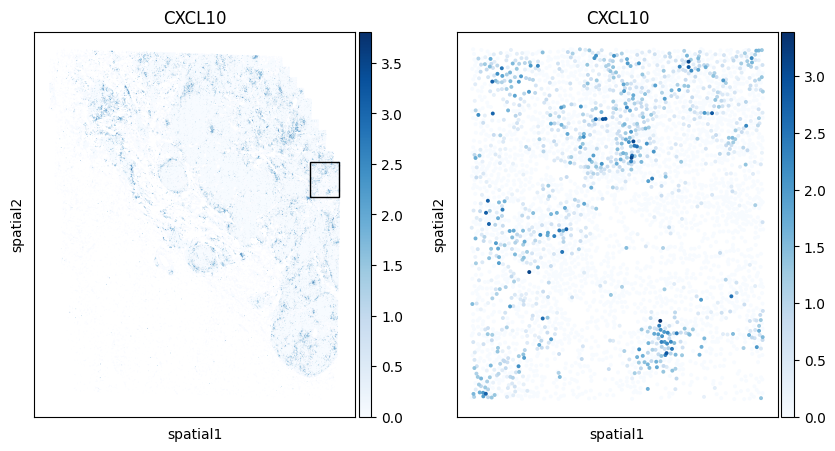

In [34]:
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL10', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCL9', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);
fig, axarr = plt.subplots(1,2,figsize=(10,5))
mb.plot.embedding_zoom(
    adata, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='CXCR3', 
    mask=None, 
    basis='spatial',
    cmap='Blues',
    show=True,
    axs=axarr
);